In [27]:

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.regularizers
from sklearn.datasets import make_moons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
from mlxtend.plotting import plot_decision_regions
warnings.filterwarnings('ignore')

In [10]:

x,y=make_moons(100,noise=0.25,random_state=2)

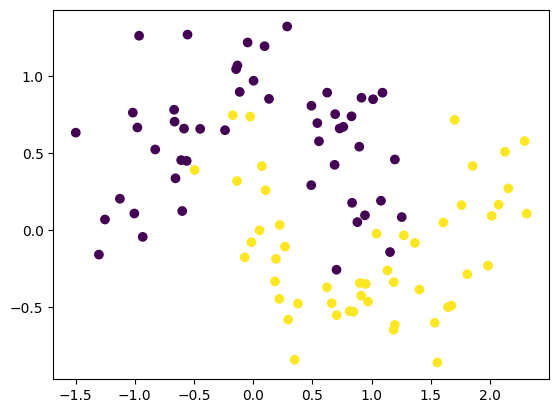

In [12]:
plt.scatter(x[:,0],x[:,1],c=y)

In [14]:
model =Sequential()
model.add(Dense(128,input_dim=2,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
adam=Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])


In [19]:
history1=model.fit(x,y,epochs=2000,verbose=0,validation_split=0.2)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

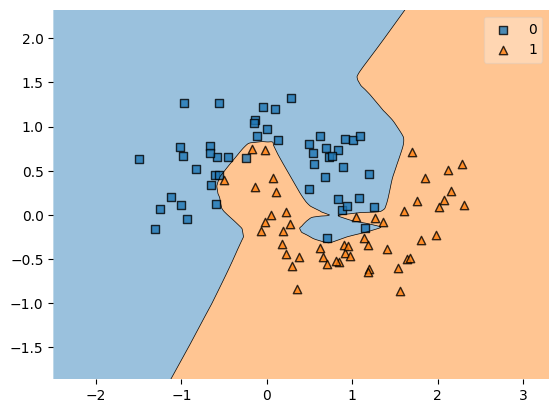

In [22]:
plot_decision_regions(x,y.astype('int'),clf=model,legend=2)

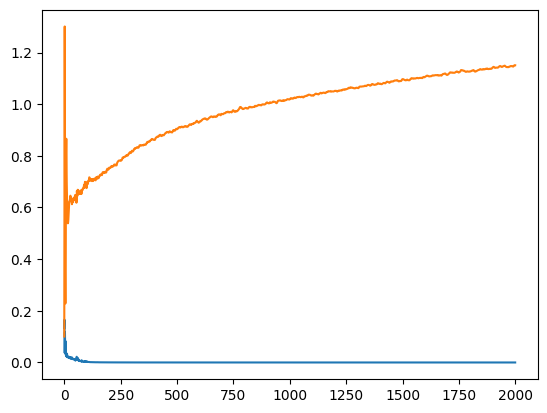

In [23]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])



In [36]:
model2=Sequential()
model2.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
adam=Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [42]:
history1=model2.fit(x,y,epochs=2000,verbose=0,validation_split=0.2)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

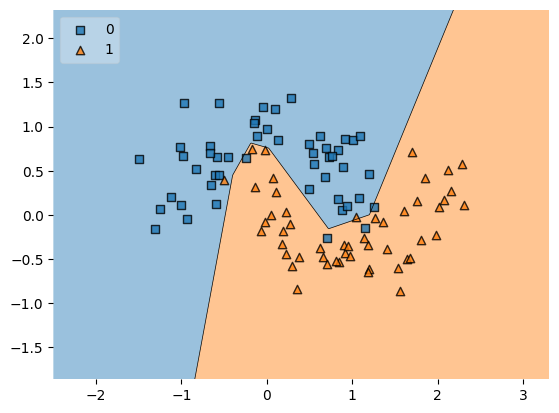

In [43]:
plot_decision_regions(x,y.astype('int'),clf=model2,legend=2)

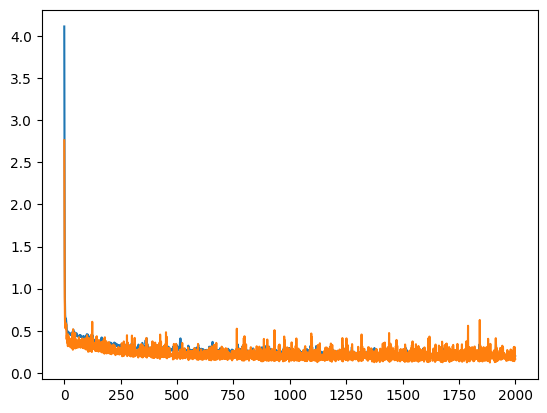

In [44]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [49]:
model.get_weights()[0]

array([[-2.19809681e-01, -2.23218948e-01,  7.40874112e-02,
        -4.75379795e-01,  1.22292109e-01,  2.44470999e-01,
         3.02326977e-01, -7.03263236e-03,  2.73237109e-01,
        -3.73119265e-01, -2.49124542e-01, -2.76931435e-01,
         3.94330442e-01, -1.10225543e-01,  3.74555856e-01,
        -1.10175394e-01, -4.86008912e-01,  2.56871432e-01,
         2.34379679e-01,  3.72922331e-01,  2.68532246e-01,
        -3.76749218e-01,  4.59057242e-02,  1.80310577e-01,
         3.57755125e-01, -8.88595283e-02, -6.39329776e-02,
         2.51540244e-01, -1.12971812e-01, -7.56413266e-02,
         4.75291647e-02,  5.26072085e-01,  2.51246512e-01,
        -5.48514605e-01,  2.67067641e-01, -6.84958324e-02,
         2.58189470e-01, -2.63589829e-01,  2.76377708e-01,
        -3.51736218e-01, -7.45445341e-02, -2.85303500e-02,
         2.98523068e-01,  2.77486354e-01,  3.18430305e-01,
         8.74122232e-03, -2.05053970e-01, -4.46289331e-01,
        -3.43912244e-01, -3.07533771e-01, -1.99944079e-0

In [50]:
model2.get_weights()[0]

array([[ 4.95782930e-36, -1.92804664e-35,  2.05040596e-35,
        -1.63090658e-36, -7.89979269e-36,  9.73200411e-36,
         3.18289202e-36,  1.16534108e-35, -9.37085815e-37,
         1.71275008e-35,  1.33093655e-35, -8.04714490e-36,
        -1.35592958e-36, -1.75509974e-35, -9.50203655e-36,
        -1.60126179e-35, -9.17188651e-36, -1.04306455e-35,
         6.71681088e-36, -3.09769334e-14, -4.36448482e-36,
        -3.85258588e-36,  9.83186517e-36, -1.38764071e-36,
         8.70118654e-36,  3.30894813e-02, -5.45043454e-36,
         4.73308058e-36,  1.83946427e-35,  1.46616231e-35,
        -1.26591974e-35, -3.05626809e-36,  7.15285443e-36,
        -2.86558316e-36, -6.01607878e-36, -6.61020160e-01,
        -4.64782065e-36,  9.61371569e-36, -8.01899876e-36,
        -1.56365071e-35,  6.35006583e-36,  7.20999476e-36,
         1.71091797e-35,  4.61082041e-01, -8.05132987e-36,
        -1.53637542e-35, -1.68807130e-36, -5.76664927e-36,
        -6.44181666e-36,  8.64128971e-38,  1.30044228e-3